### Численные методы ЛР8 (численное интегрирование), задачи 8.1, 8.3. 

### Якименко Александра (32 в списке группы). Выполняемые задачи, согласно приложению 8А: 8.1.2, 8.3.1. 

# Задача 8.1 (вариант 2)
Вычислить значение интеграла $I=\int\limits_1^{1.44} \ P_n(x)dx$, где $P_n(x)=\sum\limits_{i=0}^n c_i x^i$, с помощью квадратурных формул трапеций и Симпсона для элементарного отрезка интегрирования. Оценить величину погрешности. Применяя те же квадратурные формулы для составного отрезка интегрирования, вычислить интеграл $I$ с точностью 0.0001. Предварительно оценить шаг интегрирования, при котором достигается заданная точность. 

            ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Вычислить значение интеграла $I$ аналитически.
2. Задать многочлен $P_n(x)$. Вычислить значение интеграла $I$ по формулам трапеций и Симпсона, считая отрезок $[1,1.44]$ элементарным отрезком интегрирования.
3. Найти абсолютные погрешности результатов.
4. Используя выражение для остаточных членов интегрирования (см. ПРИЛОЖЕНИЕ 8.C), оценить шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001.
5. Вычислить значения интеграла по составной квадратурной формуле с найденным шагом (см. ПРИЛОЖЕНИЕ 8.B).
6. Найти абсолютные погрешности результатов. 

$c_0 = 1; c_1 = 0.9; c_2 = 0.8; c_3 = 0.7; c_4 = 0.5$

## 1. Вычислить значение интеграла $I$ аналитически.

$I=\int\limits_1^{1.44} \ P_n(x)dx = \int\limits_1^{1.44}\sum\limits_{i=0}^n c_i x^i dx = \sum\limits_{i=0}^n c_i \int\limits_1^{1.44} x^i dx$

$\int\limits_1^{1.44} x^i dx = \frac{x^{i+1}}{i+1}\big\rvert^{1.44}_{1} = \frac{1.44^{i+1}}{i+1} - \frac{1^{i+1}}{i+1}$

$I = \sum\limits_{i=0}^n c_i \int\limits_1^{1.44} x^i dx = \sum\limits_{i=0}^n \frac{c_i}{i+1}(1.44^{i+1} - 1)$

In [1]:
import numpy as np

c = np.array([1, 0.9, 0.8, 0.7, 0.5])
a, b = (1, 1.44)
I_sum = 0
for i in range(len(c)):
    I_sum +=c[i]/(i+1)*(1.44**(i+1)-1)

print("Аналитическое решение I =", I_sum)

Аналитическое решение I = 2.54935734357


## 2. Вычислить значение интеграла $I$ по формулам трапеций и Симпсона.
Cчитать отрезок $[1,1.44]$ элементарным отрезком интегрирования.
Предварительно задать многочлен $P_n(x)$.

Квадратурная формула трапеции: $\int\limits^b_a f(x)dx \approx h \left( \frac{f_0 + f_n}{2} + \sum\limits_{i=1}^{n-1} f_i \right)$

Квадратурная формула Симпсона: $\int\limits_a^b f(x)dx\approx\frac{h}{6}\left(f(x_0)+f(x_n)+4\sum\limits_{i=0}^{n-1}f_{i-1/2}+2\sum\limits_{i=1}^{n-1}f_{i}\right)$


Если считать $[1, 1.44]$ элементарным отрезаком интегрировани, то 

по формуле трапеции: $\int\limits^b_a f(x)dx \approx \frac{ f(a) + f(b) }{2} (b - a)$

по Формуле Симпсона: $\int\limits_a^b f(x)dx \approx \frac{b-a}{6} \left( f(a)  + f(b) + 4 f\left(\frac{a+b}{2}\right) \right)$

In [2]:
def P(x):
    p = 0
    for i in range(len(c)):
        p += c[i] * x**i
    return p

In [3]:
I_trap = (P(a) + P(b))/2 * (b-a)
print("По формуле трапеции I =", I_trap)

I_simp = (b - a)/6 * (P(a) + P(b) + 4*P((a + b)/2))
print("По формуле Симпсона I =", I_simp)

По формуле трапеции I = 2.6608950016
По формуле Симпсона I = 2.54942605867


In [4]:
print("Абсолютная погрешность по формуле трапеции: ", abs(I_trap - I_sum))
print("Абсолютная погрешность по формуле Симпсона: ", abs(I_simp - I_sum))

Абсолютная погрешность по формуле трапеции:  0.111537658027
Абсолютная погрешность по формуле Симпсона:  6.87150933332e-05


## 4. Оценка шагов интегрирования.
Используя выражение для остаточных членов интегрирования (см. ПРИЛОЖЕНИЕ 8.C), оценить шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001

Оценка погрешностей для составных фомул:

Трапеции $|R_{trap}|=|I-I_{trap}|\le \frac{M_2(b-a)h^2}{12}$, где $M_2 = \max\limits_{[a,b]}|f^{(2)}(x)|$

Симпсона $|R_{simp}|=|I-I_{simp}|\le \frac{M_4(b-a)h^4}{2880}$, где $M_4 = \max\limits_{[a,b]}|f^{(4)}(x)|$

### Зададим погрешность, посмотрим где вторая и четвертая производные достигают максимума на отрезке, затем посчитаем оценки для шага, выразив h из формул выше, взяв |R| < 0.0001 

In [5]:
epsilon = 1e-4

from scipy.misc import derivative
dfdx2 = derivative(P, np.linspace(a, b, 44), dx = 2.0)
dfdx4 = derivative(P, np.linspace(a, b, 44), dx = 4.0)

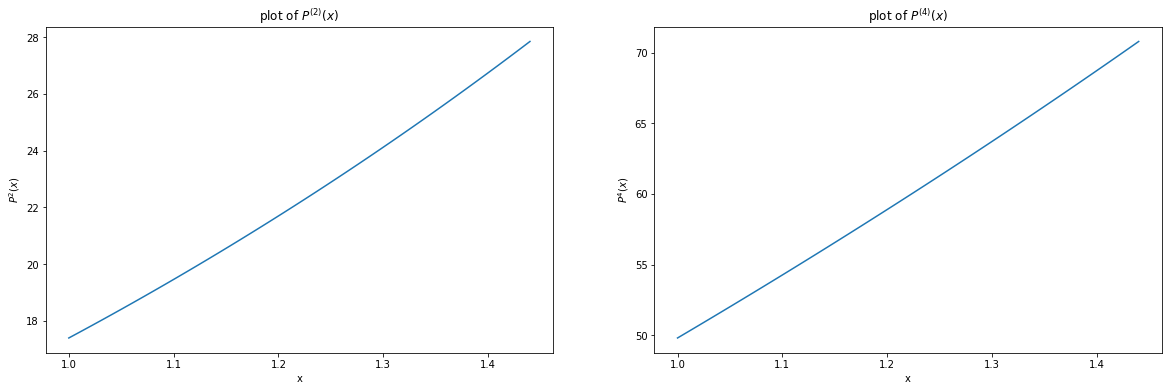

In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,6))

plt.subplot(121)
plt.plot(np.linspace(a, b, 44), dfdx2)
plt.xlabel("x")
plt.ylabel(r"$P^2(x)$")
plt.title(r"plot of $P^{(2)}(x)$")

plt.subplot(122)
plt.plot(np.linspace(a, b, 44), dfdx4)
plt.xlabel("x")
plt.ylabel(r"$P^4(x)$")
plt.title(r"plot of $P^{(4)}(x)$")
plt.show()

### Максимумы производных на правом конце отрезка

In [7]:
M2 = abs(derivative(P, b, dx = 2.0))
M4 = abs(derivative(P, b, dx = 4.0))

h_trap = np.sqrt(12*epsilon/M2/(b-a))
h_simp = (2880*epsilon/M4/(b-a))**0.25

print("Вторая производная:", M2, "\nОценка шага интегрирования для метода трапеций <=", h_trap)
print("Четвертая производная:", M4, "\nОценка шага интегрирования для метода трапеций <=", h_simp)


print("\nСкорректируем шаг (см приложение 8В) как длина_отрезка_инт/количество_шагов")
h_trap = (b-a)/(np.ceil((b-a)/h_trap))
h_simp = (b-a)/(np.ceil((b-a)/h_simp))

print("Шаг метода трапеции:", h_trap, "\nШаг метода Симпсона:", h_simp)

Вторая производная: 27.850528 
Оценка шага интегрирования для метода трапеций <= 0.00989572386965
Четвертая производная: 70.810528 
Оценка шага интегрирования для метода трапеций <= 0.310070532172

Скорректируем шаг (см приложение 8В) как длина_отрезка_инт/количество_шагов
Шаг метода трапеции: 0.00977777777778 
Шаг метода Симпсона: 0.22


## 5. Вычислить значения интеграла по составной квадратурной формуле с найденным шагом.
(см. ПРИЛОЖЕНИЕ 8.B).

Квадратурная формула трапеции: $\int\limits^b_a f(x)dx \approx h \left( \frac{f_0 + f_n}{2} + \sum\limits_{i=1}^{n-1} f_i \right)$

Квадратурная формула Симпсона: $\int\limits_a^b f(x)dx\approx\frac{h}{6}\left(f(x_0)+f(x_n)+4\sum\limits_{i=0}^{n-1}f_{i-1/2}+2\sum\limits_{i=1}^{n-1}f_{i}\right)$

In [8]:
I_trap_full = h_trap*((P(a)+P(b))/2 + np.sum(P(np.arange(a + h_trap, b, h_trap))))
print("По составной формуле трапеции I =", I_trap_full)
I_simp_full = h_simp/6*(P(a) + P(b) + 2*np.sum(P(np.arange(a + h_simp, b, h_simp))) + 4*np.sum(P(np.arange(a + h_simp/2, b, h_simp))))
print("По составной формуле трапеции I =", I_simp_full)

По составной формуле трапеции I = 2.54941255956
По составной формуле трапеции I = 2.54936163827


## 6. Найти абсолютные погрешности результатов.

In [9]:
print("Абсолютная погрешность по составной квадратурной формуле трапеции: ", abs(I_trap_full - I_sum))
print("Абсолютная погрешность по составной квадратурной формуле Симпсона: ", abs(I_simp_full - I_sum))

Абсолютная погрешность по составной квадратурной формуле трапеции:  5.52159914506e-05
Абсолютная погрешность по составной квадратурной формуле Симпсона:  4.29469333296e-06


# Задача 8.3 (вариант 1)
Вычислить значение интеграла $\int\limits_a^b \ f(x)dx$ аналитически и, используя формулу центральных прямоугольников,  с шагами : $h=\frac{b-a}{2},\frac{b-a}{3},\dots,\frac{b-a}{20}$. При указанных значениях $h$ найти абсолютную погрешность и оценки теоретической абсолютной погрешности. На одном чертеже построить графики найденных погрешностей.

Дано:

$f(x) = (2x)^3 \cos(x)$

$[a, b] = [0, 1.5]$

## 1. Аналитическое решение.

$\int\limits_a^b f(x)dx = \int\limits_0^{1.5} (2x)^3 \cos(x)dx = 8 \int\limits_0^{1.5} x^3 \cos(x)dx = \left< u=x^3; dv = cos(x)dx\right> = 8((x^3\sin(x)-3)|_0^{1.5} - \int\limits_0^{1.5} x^2\sin(x)dx)$

$\int\limits_0^{1.5} x^2\sin(x)dx = <u = x^2; dv = \sin(x)dx> = -x^2\cos(x)|_0^{1.5} + 2\int\limits_0^{1.5} x\cos(x)dx$

$\int\limits_0^{1.5} x\cos(x)dx = x\sin(x)|_0^{1.5}+\cos(x)$

$\int\limits_0^{1.5} (2x)^3 \cos(x)dx = 8 ((3x^2 - 6) \cos(x) + x (x^2 - 6) sin(x))|_0^{1.5} = 3.53715$

In [10]:
I = 3.53715

## 2. Метод центральных прямоугольников.

Полная формула центральных прямогуольников $\int\limits_a^b \ f(x)dx \approx h\sum\limits_{i=0}^{n-1} f_{i+1/2}$

Оценка погрешности для центральных прямоугольников $|R_{rect}|=|I-I_{rect}|\le \frac{M_2(b-a)h^2}{24}$, где $M_2 = \max\limits_{[a,b]}|f^{(2)}(x)|$

In [11]:
def f(x):
    return (2*x)**3*np.cos(x)
a, b = (0, 1.5)

In [12]:
x = np.linspace(a, b, 50)
dfdx2 = derivative(f, x, dx = 2.0)

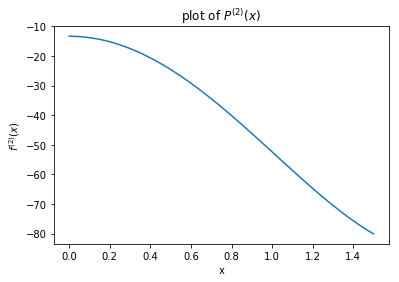

In [13]:
plt.plot(x, dfdx2)
plt.xlabel("x")
plt.ylabel(r"$f^{(2)}(x)$")
plt.title(r"plot of $f^{(2)}(x)$")
plt.show()

### Максимум второй производной на правом конце отрезка

In [14]:
M2 = abs(derivative(f, b, dx = 2.0))

In [17]:
I_rect_full = []
prec = []
dev = np.arange(2, 21)
for i, d in enumerate(dev):
    h_rect = (b-a)/d
    prec.append(M2*(b-a)*h_rect**2/24)
    I_rect_full.append(h_rect*(np.sum(f(np.arange(a + h_rect/2, b, h_rect)))))
    print("По составной формуле трапеции I =", I_rect_full[i])

По составной формуле трапеции I = 3.97794593599
По составной формуле трапеции I = 3.75873794879
По составной формуле трапеции I = 3.66659178441
По составной формуле трапеции I = 3.62138603572
По составной формуле трапеции I = 3.59616756182
По составной формуле трапеции I = 3.58073892479
По составной формуле трапеции I = 3.57063609796
По составной формуле трапеции I = 3.56366930442
По составной формуле трапеции I = 3.55866593067
По составной формуле трапеции I = 3.55495324948
По составной формуле трапеции I = 3.55212333846
По составной формуле трапеции I = 3.54991735211
По составной формуле трапеции I = 3.54816469818
По составной формуле трапеции I = 3.54674928276
По составной формуле трапеции I = 3.54558989686
По составной формуле трапеции I = 3.54462836337
По составной формуле трапеции I = 3.54382212646
По составной формуле трапеции I = 3.54313947882
По составной формуле трапеции I = 3.54255640645


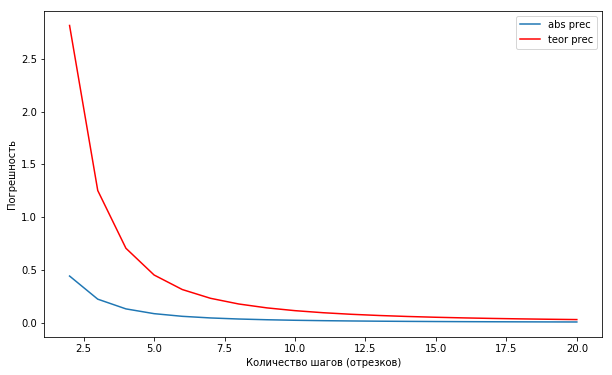

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

I_rect_full = np.array(I_rect_full)
prec = np.array(prec)
ax.plot(dev, np.abs(I - I_rect_full), label ="abs prec")
ax.plot(dev, prec, 'r', label = "teor prec")
ax.set_ylabel("Погрешность")
ax.set_xlabel("Количество шагов (отрезков)")
ax.legend();
plt.show()